In [1]:
library(qvalue)
library(ggplot2)
library(cowplot)
library(dplyr)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
endo_eqtl_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/eqtl_allstages.tsv"
df0 = read.csv(endo_eqtl_file, sep = "\t")
nrow(df0)
length(unique(df0$feature))
head(df0,2)

[1] 4877

[1] 3240

snp_id,feature,stage
5_149826526_C_T,ENSG00000164587_RPS14,ips
11_57283988_C_T,ENSG00000134809_TIMM10,ips


In [3]:
df0$chrom = gsub("_.*","",df0$snp_id)
head(df0,2)

snp_id,feature,stage,chrom
5_149826526_C_T,ENSG00000164587_RPS14,ips,5
11_57283988_C_T,ENSG00000134809_TIMM10,ips,11


In [4]:
# for (chrom in 1:22){
#     print(c(chrom, length(unique(df0[df0$chrom == chrom,]$feature))))
# }

In [5]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/PCA/"

In [6]:
list.files(folder)

[1] "PCA1_summary.csv"       "PCA10_summary.csv"      "PCA2_summary_perms.csv"
[4] "PCA2_summary.csv"       "PCA20_summary.csv"      "PCA5_summary.csv"      
[7] "PCA50_summary.csv"

In [8]:
summary_filename = paste0(folder, "PCA2_summary.csv")
df = read.csv(summary_filename, row.names = 1)
for (chrom in 1:22){
    print(c(chrom, length(unique(df[df$chrom == chrom,]$gene)),length(unique(df0[df0$chrom == chrom,]$feature))))
}

[1]   1 234 315
[1]   2 181 230
[1]   3 127 190
[1]   4 116 116
[1]   5 152 165
[1]   6 133 186
[1]   7 136 175
[1]   8 124 124
[1]   9 130 130
[1]  10 118 121
[1]  11 117 178
[1]  12 119 172
[1] 13 59 59
[1]  14 110 110
[1]  15 105 106
[1]  16 148 154
[1]  17 127 200
[1] 18 51 51
[1]  19 162 246
[1] 20 79 79
[1] 21 44 45
[1] 22 88 88


In [9]:
T = 0.05
# T = 0.1

In [10]:
##### PC1

In [11]:
summary_filename = paste0(folder, "PCA1_summary.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
head(df,2)

[1] 4466

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000172845_SP3,1,2,0.11316844,2_174679935_A_G,0.11316844
1,ENSG00000092758_COL9A3,1,20,0.06549851,20_61465531_G_T,0.06549851


In [12]:
df$qv = qvalue(df$pv, pi0 = 1)$qvalue
mofa1 = length(unique(df[df$qv<T,"gene"]))
n_genes1 = length(unique(df$gene))
c(mofa1,n_genes1, mofa1/n_genes1)

[1] 1181.000000 3237.000000    0.364844

In [13]:
# hist(df$qv)

In [14]:
##### PC1:2

In [15]:
summary_filename = paste0(folder, "PCA2_summary.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 3862

,gene,n_snps,chrom,pv_raw,snpID,pv
3860,ENSG00000167123_CERCAM,1,9,0.1946522,9_131092986_C_T,0.1946522
3861,ENSG00000109686_SH3D19,1,4,0.2624034,4_152176269_C_T,0.2624034


In [16]:
df$qv = qvalue(df$pv)$qvalue
mofa2 = length(unique(df[df$qv<T,"gene"]))
n_genes2 = length(unique(df$gene))
c(mofa2,n_genes2, mofa2/n_genes2)

[1] 1192.0000000 2660.0000000    0.4481203

In [17]:
##### PC1:5

In [18]:
summary_filename = paste0(folder, "PCA5_summary.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 4073

,gene,n_snps,chrom,pv_raw,snpID,pv
4071,ENSG00000066923_STAG3,1,7,0.143731,7_99894971_A_G,0.143731
4072,ENSG00000109686_SH3D19,1,4,0.927283,4_152176269_C_T,0.927283


In [19]:
df$qv = qvalue(df$pv)$qvalue
# mofa5 = nrow(df[df$qv<0.05,])
# n_genes5 = nrow(df)
mofa5 = length(unique(df[df$qv<T,"gene"]))
n_genes5 = length(unique(df$gene))
c(mofa5,n_genes5, mofa5/n_genes5)

[1] 1140.0000000 2862.0000000    0.3983229

In [20]:
##### PC1:10

In [21]:
summary_filename = paste0(folder, "PCA10_summary.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 3207

,gene,n_snps,chrom,pv_raw,snpID,pv
3205,ENSG00000167123_CERCAM,1,9,0.514736433,9_131092986_C_T,0.514736433
3206,ENSG00000109686_SH3D19,1,4,0.008048432,4_152176269_C_T,0.008048432


In [22]:
# df$qv = qvalue(df$pv,pi0 = 1)$qvalue
df$qv = qvalue(df$pv)$qvalue
# mofa10 = nrow(df[df$qv<0.05,])
# n_genes10 = nrow(df)
mofa10 = length(unique(df[df$qv<T,"gene"]))
n_genes10 = length(unique(df$gene))
c(mofa10,n_genes10, mofa10/n_genes10)

[1]  817.0000000 2093.0000000    0.3903488

In [23]:
head(df[order(df$qv),],10)

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
973,ENSG00000137812_CASC5,2,15,3.636266e-29,15_40891319_T_A,7.272531e-29,2.332301e-25
2412,ENSG00000103811_CTSH,1,15,1.687311e-25,15_79229199_A_G,1.687311e-25,2.705604e-22
1337,ENSG00000111671_SPSB2,3,12,2.445415e-23,12_6979010_G_A,7.336244e-23,7.842445e-20
2371,ENSG00000147813_NAPRT1,1,8,2.807839e-22,8_144676862_C_T,2.807839e-22,2.251185e-19
1741,ENSG00000226278_PSPHP1,3,7,4.022049e-22,7_55802063_T_C,1.206615e-21,6.449355e-19
1742,ENSG00000226278_PSPHP1,3,7,4.022049e-22,7_55806087_G_T,1.206615e-21,6.449355e-19
2796,ENSG00000134222_PSRC1,1,1,5.823909e-21,1_109822143_G_A,5.823909e-21,2.668182e-18
1640,ENSG00000186577_C6orf1,1,6,1.619449e-19,6_34239473_G_A,1.619449e-19,6.491968e-17
454,ENSG00000110628_SLC22A18,3,11,1.828616e-19,11_2940492_T_C,5.485848e-19,1.954791e-16
1000,ENSG00000165650_PDZD8,2,10,1.743567e-18,10_119020736_A_C,3.487134e-18,1.118324e-15


In [24]:
##### PC1:20

In [25]:
summary_filename = paste0(folder, "PCA20_summary.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 1028

,gene,n_snps,chrom,pv_raw,snpID,pv
1026,ENSG00000204711_C9orf135,3,9,0.016324988,9_72410323_G_A,0.048974963
1027,ENSG00000204711_C9orf135,3,9,0.001679854,9_72433081_G_A,0.005039562


In [26]:
df$qv = qvalue(df$pv,pi0 = 1)$qvalue
# mofa20 = nrow(df[df$qv<0.05,])
# n_genes20 = nrow(df)
mofa20 = length(unique(df[df$qv<T,"gene"]))
n_genes20 = length(unique(df$gene))
c(mofa20,n_genes20, mofa20/n_genes10)

[1] 293.0000000 535.0000000   0.1399904

In [27]:
##### PC1:50

In [28]:
summary_filename = paste0(folder, "PCA50_summary.csv")
df = read.csv(summary_filename, row.names = 1)
# df = df[df$chrom == 22,]
nrow(df)
tail(df,2)

[1] 567

,gene,n_snps,chrom,pv_raw,snpID,pv
565,ENSG00000204711_C9orf135,3,9,2.873550e-04,9_72410323_G_A,8.620650e-04
566,ENSG00000204711_C9orf135,3,9,6.854557e-07,9_72433081_G_A,2.056367e-06


In [29]:
df$qv = qvalue(df$pv,pi0 = 1)$qvalue
mofa50 = length(unique(df[df$qv<T,"gene"]))
n_genes50 = length(unique(df$gene))
c(mofa50,n_genes50, mofa50/n_genes50)

[1] 142.0000000 272.0000000   0.5220588

In [30]:
df_to_plot = data.frame(n_MOFA = c(1,2,5,10,20,50), 
                        n_eGenes = c(mofa1, mofa2, mofa5, mofa10, mofa20, mofa50), 
                        n_genes = c(n_genes1, n_genes2, n_genes5, n_genes10, n_genes20, n_genes50))

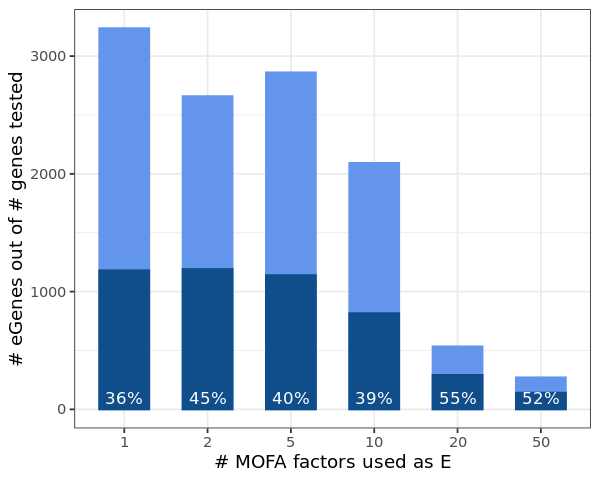

In [31]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + #ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") + theme_bw() +
    annotate("text", x=1, y=100, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=100, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=100, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=100, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=5, y=100, label= paste0(round(mofa20/n_genes20,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=6, y=100, label= paste0(round(mofa50/n_genes50,digits=2)*100,"%"), size = 3.5, col = "white")

In [122]:
prefixes = c("PCA1","PCA2","PCA5","PCA10","PCA20","PCA50")

In [123]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(folder,prefix,"_summary.csv")
    df0 = read.csv(file0, row.names=1)
#     df0 = df0[df0$gene %in% chrom_22$feature,]
#     file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
#     df1 = read.csv(file1, row.names=1)
#     df1$gene = gsub("_perm0","",df1$gene)
#     df1 = df1[df1$gene %in% chrom_22$feature,]
#     df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df = df0
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
#     p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1) + theme_bw()
    plist[[i]] = p + ggtitle(prefix) 
    i = i+1
} 

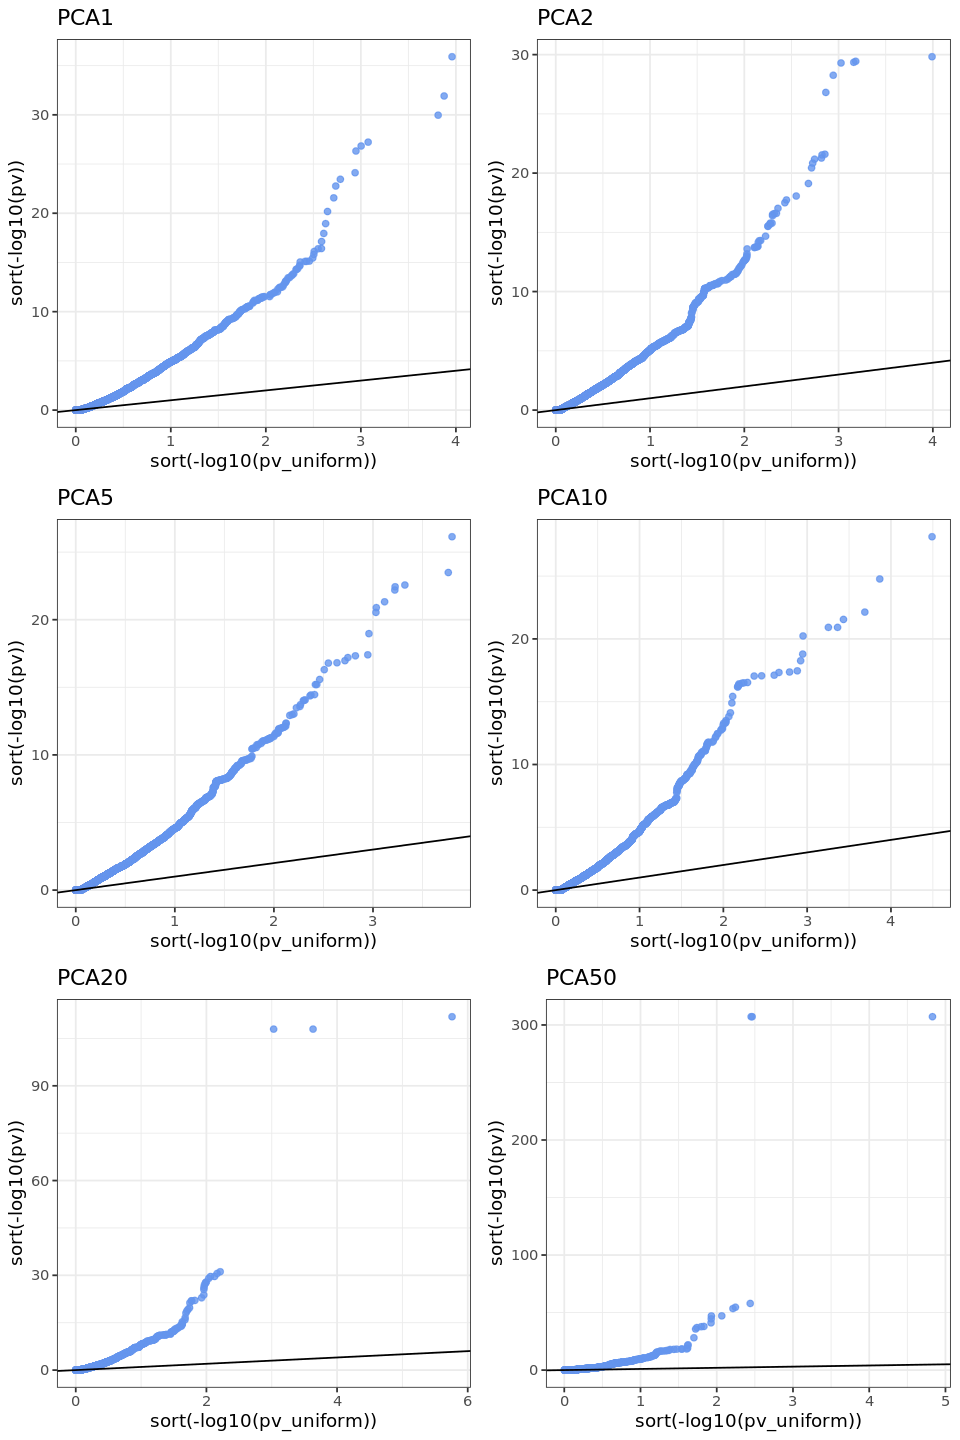

In [124]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],plist[[5]],plist[[6]],ncol = 2)

In [125]:
prefixes = c("PCA2")

In [126]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(folder,prefix,"_summary.csv")
    df0 = read.csv(file0, row.names=1)
#     df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(folder,prefix,"_summary_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
#     df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1) + theme_bw()
    plist[[i]] = p + ggtitle(prefix) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

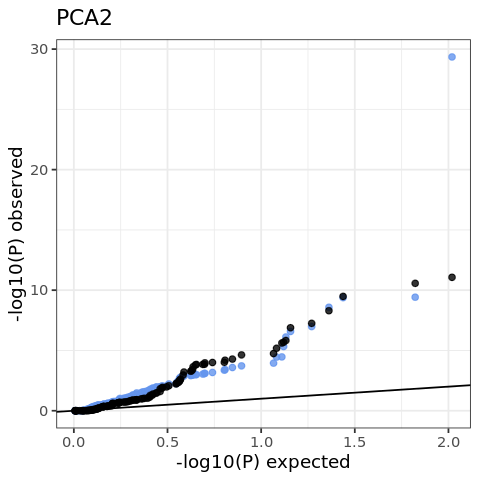

In [127]:
options(repr.plot.width = 4, repr.plot.height = 4)
plist[[1]] + xlab("-log10(P) expected") + ylab("-log10(P) observed")

In [56]:
T = 0.05
options(repr.plot.width = 5, repr.plot.height = 4)
for (chrom in 1:22){
    # MOFA1
    summary_filename = paste0(folder, "MOFA1/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa1 = length(unique(df[df$qv<T,"gene"]))
    n_genes1 = length(unique(df$gene))
    # MOFA2
    summary_filename = paste0(folder, "MOFA2/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa2 = length(unique(df[df$qv<T,"gene"]))
    n_genes2 = length(unique(df$gene))
    # MOFA5
    summary_filename = paste0(folder, "MOFA5/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa5 = length(unique(df[df$qv<T,"gene"]))
    n_genes5 = length(unique(df$gene))
    # MOFA10
    summary_filename = paste0(folder, "MOFA10/summary_endo_eqtl.csv")
    df = read.csv(summary_filename, row.names = 1)
    df = df[df$chrom == chrom,]
    df$qv = qvalue(df$pv,pi0 = 1)$qvalue
    mofa10 = length(unique(df[df$qv<T,"gene"]))
    n_genes10 = length(unique(df$gene))
    # build df and plot
    df_to_plot = data.frame(n_MOFA = c(1,2,5,10), 
                        n_eGenes = c(mofa1, mofa2, mofa5, mofa10), 
                        n_genes = c(n_genes1, n_genes2, n_genes5, n_genes10))
    p = ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + 
        ggtitle(paste0("chromosome ",chrom)) + 
        geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
        geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
                 fill = "dodgerblue4", col = "dodgerblue4") + 
        xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") + theme_bw() +
        annotate("text", x=1, y=25, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "white") +
        annotate("text", x=2, y=25, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "white") +
        annotate("text", x=3, y=25, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "white") +
        annotate("text", x=4, y=25, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "white")
    print(p)
    
}

Warning message in file(file, "rt"):
“cannot open file '/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/PCA/MOFA1/summary_endo_eqtl.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


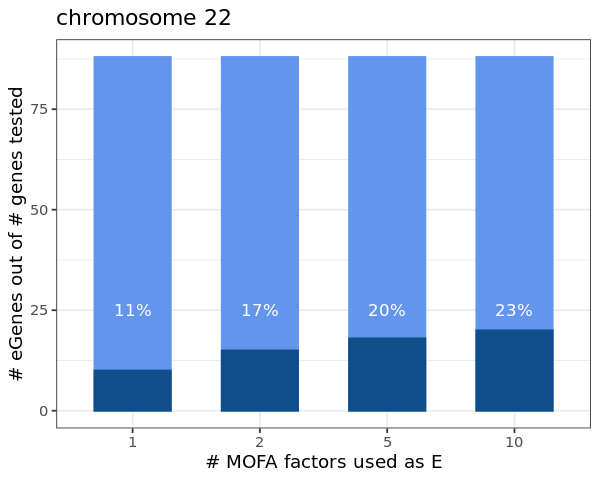

In [1804]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_to_plot, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") + theme_bw() +
    annotate("text", x=1, y=25, label= paste0(round(mofa1/n_genes1,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=25, label= paste0(round(mofa2/n_genes2,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=25, label= paste0(round(mofa5/n_genes5,digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=25, label= paste0(round(mofa10/n_genes10,digits=2)*100,"%"), size = 3.5, col = "white")